# Objetivo

Objetivo desse notebook é analisar a correlação entre as variáveis e definir as possíveis variáveis que serão entradas do modelo.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
import pandas as pd

import util
from class_manipulate_data import ManipulateData

manipulate_data = ManipulateData()
path_preprocessing_output = manipulate_data.get_path_preprocessing_output()

In [2]:
def filter_corr(df_data: pd.DataFrame) -> pd.DataFrame:
    """Responsável por remover as variáveis flat (baixa variância)

    Parameters
    ----------
    df_data : pd.DataFrame
        Os dados das variáveis

    Returns
    -------
    pd.DataFrame
        DataFrame sem as variáveis flat.
    """
    # removendo sensores com baixa variância
    good_sensor = list(df_data.columns)
    for sensor in df_data.columns:
        if df_data[sensor].var() <= 0.00000001:
            print("Sensor is flat:", sensor)
            good_sensor.remove(sensor)
    df_data = df_data[good_sensor]

    return df_data

# Dados de treinamento

In [3]:
path_dataset_train = os.path.join(path_preprocessing_output, "train_FD001.csv")

df_train = pd.read_csv(path_dataset_train)
df_train = df_train.drop(columns=['unit_number'])

df_train = filter_corr(df_train)

Sensor is flat: setting_3
Sensor is flat: sensor_1
Sensor is flat: sensor_5
Sensor is flat: sensor_10
Sensor is flat: sensor_16
Sensor is flat: sensor_18
Sensor is flat: sensor_19


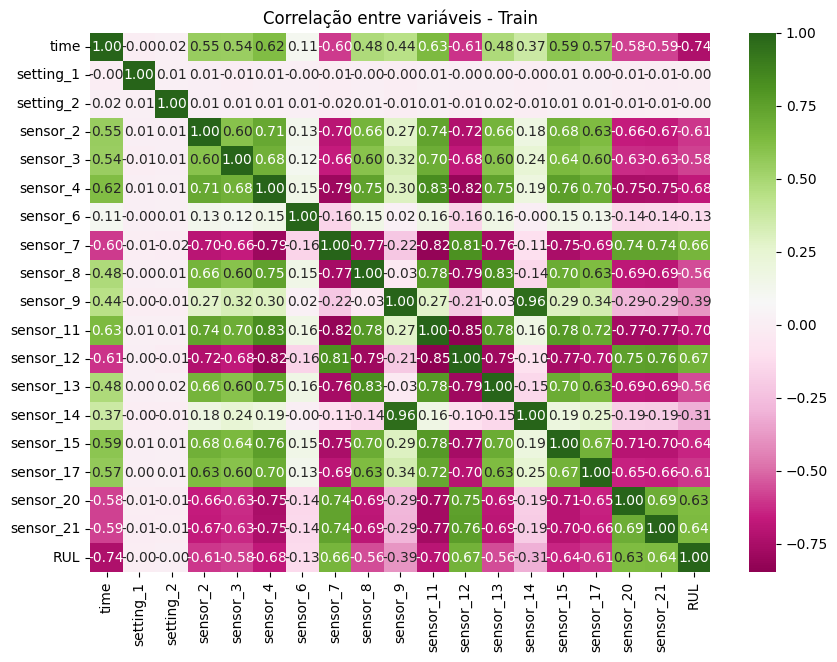

In [4]:
plt.figure(figsize=(10, 7))
sns.heatmap(df_train.corr(method='pearson'),
            annot = True,
            fmt = '.2f',
            cmap='PiYG')
plt.title('Correlação entre variáveis - Train')
plt.show()

# Dados de teste

In [5]:
path_dataset_test = os.path.join(path_preprocessing_output, "test_FD001.csv")

df_test = pd.read_csv(path_dataset_test)
df_test = df_test.drop(columns=['unit_number'])

df_test = filter_corr(df_test)

Sensor is flat: setting_3
Sensor is flat: sensor_1
Sensor is flat: sensor_5
Sensor is flat: sensor_10
Sensor is flat: sensor_16
Sensor is flat: sensor_18
Sensor is flat: sensor_19


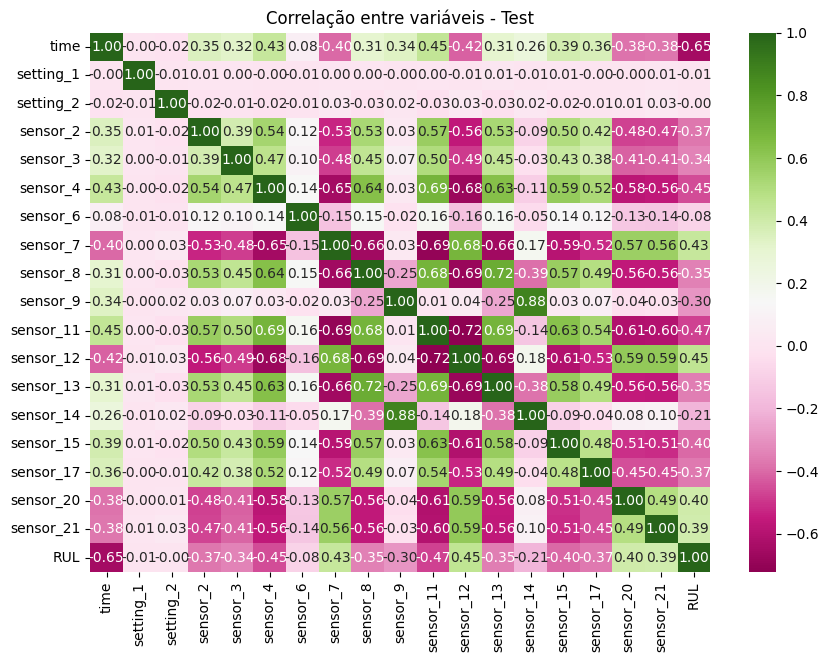

In [6]:
plt.figure(figsize=(10, 7))
sns.heatmap(df_test.corr(method='pearson'),
            annot = True,
            fmt = '.2f',
            cmap='PiYG')
plt.title('Correlação entre variáveis - Test')
plt.show()

# Conclusões

Pode-se observar que as variáveis `setting_1` e `setting_2` apresentam baixa correlação com a variável RUL. A variável `sensor_6` também possui esse comportamento. Além disso, existem variáveis que apresentaram correlação entre si, como: `sensor_9` e `sensor_14`.

Por esses motivos deverá ser feito uma seleção de variáveis.

In [7]:
# possíveis entradas para o modelo
model_input = ['sensor_2', 'sensor_3',
'sensor_4', 'sensor_7',
'sensor_8', 'sensor_9',
'sensor_11', 'sensor_12',
'sensor_13', 'sensor_15',
'sensor_17', 'sensor_20',
'sensor_21']

# Análise aplicando média móvel aos dados

In [8]:
df_train = pd.read_csv(path_dataset_train)

df_rolling = df_train.groupby('unit_number').rolling(window=24).mean()

df_rolling = filter_corr(df_rolling)
df_rolling = df_rolling.dropna()

Sensor is flat: setting_2
Sensor is flat: setting_3
Sensor is flat: sensor_1
Sensor is flat: sensor_5
Sensor is flat: sensor_10
Sensor is flat: sensor_16
Sensor is flat: sensor_18
Sensor is flat: sensor_19


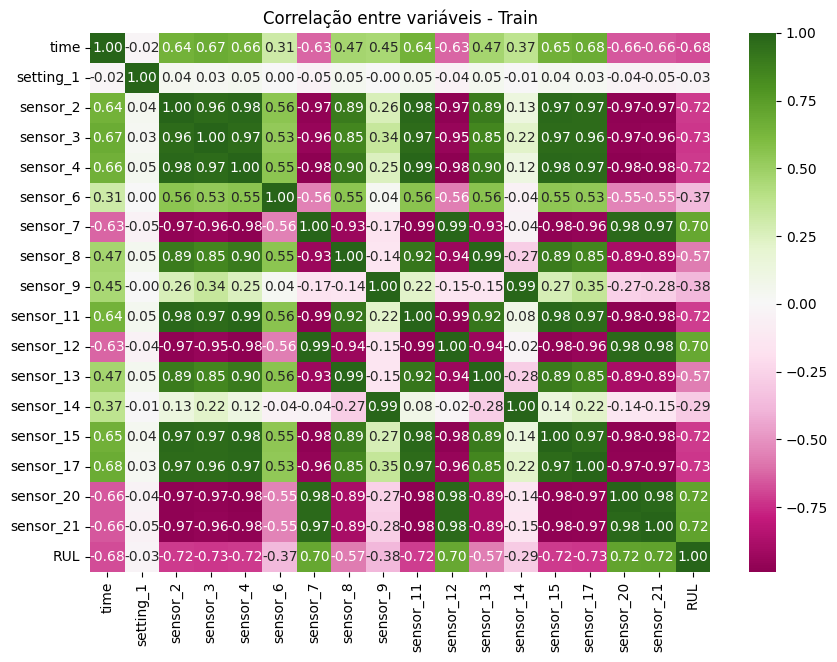

In [9]:
plt.figure(figsize=(10, 7))
sns.heatmap(df_rolling.corr(method='pearson'),
            annot = True,
            fmt = '.2f',
            cmap='PiYG')
plt.title('Correlação entre variáveis - Train')
plt.show()